## Scenario 5 - Top Industries

Given File 'startup_funding.csv'
#### Problem Statement :
1. Which type of companies got more easily funding. To answer this question, find -
2. Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
3. Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
#### Note:
1. Ecommerce is the right word in IndustryVertical, so correct it.
2. Print the industry in descending order with respect to the percentage of the amount funded.
### Output Format :
#### industry1 percent1
#### industry2 percent2
#### industry3 percent3
#### . . . 



In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("startup_funding.csv")
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [69]:
df["AmountInUSD"].fillna('0', inplace = True)
df["IndustryVertical"].fillna('', inplace = True)

# df.AmountInUSD = df.AmountInUSD.apply(lambda x: float(str(x).replace(",", "")))

industry = np.array(df["IndustryVertical"])
amount = np.array(df["AmountInUSD"])

print(len(industry))
print(len(amount))

2372
2372


In [70]:

for i in range(len(amount)):
    a = amount[i].split(',')
    currAmt = ''
    for j in a:
        currAmt += j
    if(currAmt == '' or currAmt == ' '):
        currAmt = '0'
    amount[i] = currAmt
    
amount = np.array(amount, dtype = float)
amount = np.array(amount, dtype = int)

In [71]:
type_of_industry = {}

for i in range(len(amount)):
    currIn = industry[i]
    currAmt = amount[i]
    type_of_industry[currIn] = type_of_industry.get(currIn, 0) + currAmt
    
type_of_industry
    

{'Technology': 1103593500,
 'Consumer Internet': 3797089000,
 'eCommerce': 2442712000,
 'Logistics': 180645000,
 'Others': 19188000,
 'Healthcare': 97343000,
 'Food & Beverage': 33736000,
 'ECommerce': 1834397608,
 'Finance': 39700000,
 'Education': 90765000,
 'Food & Beverages': 175000,
 'ecommerce': 2080000,
 'healthcare': 37000000,
 'Real Estate': 2500000,
 'FMCG': 520000,
 'Reality': 1000000,
 'Auto': 0,
 'Ecommerce': 2000000,
 'BFSI': 0,
 'Consumer Interne': 0,
 'Online Education Information platform': 1000000,
 'Brand Licensing Startup': 0,
 'Gourmet Food Discovery & Delivery platform': 0,
 'Transportation & Logistics Platform': 5600000,
 'Enterprise Marketing Automation platform': 500000,
 'Health, Wellness & Beauty Services App': 0,
 'Digital Healthcare': 2000000,
 'Last Minute Hotel Booking App': 1500000,
 'Womens Fashion Wear Portal': 0,
 'Product Learning platform': 0,
 'Online Food ordering & Delivery platform': 100000,
 'App based Bus Pooling Services': 20000000,
 'Social 

### Replace all the ecommerce similar words to Ecommerce

In [72]:
df.IndustryVertical.replace("eCommerce", "Ecommerce", inplace = True)
df.IndustryVertical.replace("ecommerce", "Ecommerce", inplace = True)
df.IndustryVertical.replace("ECommerce", "Ecommerce", inplace = True)

In [73]:
industry = np.array(df["IndustryVertical"])

print(len(industry))

2372


In [74]:
type_of_industry = {}

for i in range(len(amount)):
    currIn = industry[i]
    currAmt = amount[i]
    type_of_industry[currIn] = type_of_industry.get(currIn, 0) + currAmt
    
type_of_industry

{'Technology': 1103593500,
 'Consumer Internet': 3797089000,
 'Ecommerce': 4281189608,
 'Logistics': 180645000,
 'Others': 19188000,
 'Healthcare': 97343000,
 'Food & Beverage': 33736000,
 'Finance': 39700000,
 'Education': 90765000,
 'Food & Beverages': 175000,
 'healthcare': 37000000,
 'Real Estate': 2500000,
 'FMCG': 520000,
 'Reality': 1000000,
 'Auto': 0,
 'BFSI': 0,
 'Consumer Interne': 0,
 'Online Education Information platform': 1000000,
 'Brand Licensing Startup': 0,
 'Gourmet Food Discovery & Delivery platform': 0,
 'Transportation & Logistics Platform': 5600000,
 'Enterprise Marketing Automation platform': 500000,
 'Health, Wellness & Beauty Services App': 0,
 'Digital Healthcare': 2000000,
 'Last Minute Hotel Booking App': 1500000,
 'Womens Fashion Wear Portal': 0,
 'Product Learning platform': 0,
 'Online Food ordering & Delivery platform': 100000,
 'App based Bus Pooling Services': 20000000,
 'Social Learning Platform': 0,
 'Social Fitness platform': 0,
 'On Demand Mobile

In [75]:
ans = sorted(type_of_industry.items(), key = lambda x: x[1], reverse = True)[:5]
print(ans)

[('Ecommerce', 4281189608), ('Consumer Internet', 3797089000), ('', 1231811368), ('Technology', 1103593500), ('Online Marketplace', 700000000)]


### We have a '' in the top 5. So, we will now see if we have 5 valid industries in top 6

In [76]:
ans = sorted(type_of_industry.items(), key = lambda x: x[1], reverse = True)[:6]
print(ans)

[('Ecommerce', 4281189608), ('Consumer Internet', 3797089000), ('', 1231811368), ('Technology', 1103593500), ('Online Marketplace', 700000000), ('E-Commerce & M-Commerce platform', 680000000)]


In [77]:
industries = []
amount = []

for i in range(len(ans)):
    pair = ans[i]
    if(i == 2):
        continue
    industries.append(pair[0])
    amount.append(pair[1])
    
for i in range(5):
    print(industries[i], " ", amount[i])

Ecommerce   4281189608
Consumer Internet   3797089000
Technology   1103593500
Online Marketplace   700000000
E-Commerce & M-Commerce platform   680000000


In [78]:
percentage = []
total = 0
for i in amount:
    total += i
    
for i in amount:
    percentage.append((i / total) * 100)


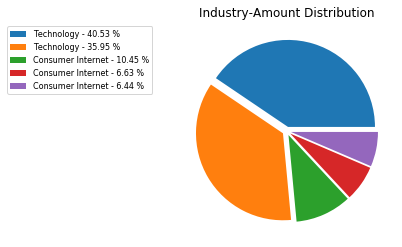

In [88]:
patches, texts = plt.pie(percentage, explode = [0.05,0.05,0.05,0.05,0.05])

labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(industry, percentage)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, industry),
                                        key = lambda x: x[2],
                                        reverse = True))
    


plt.legend(patches, labels, bbox_to_anchor = (-0.1, 1.),
          fontsize = 8)


plt.title("Industry-Amount Distribution")
plt.show()